In [32]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Layer
import matplotlib.pyplot as plt


In [ ]:
# Parámetros configurables
archivo_muestras = "vectores.csv"
archivo_salidas = "productos.csv"

# Configuración del modelo
neuronas_por_capa = [50,40,30,25,20,15,1]
activaciones = ['relu', 'relu', 'relu', 'relu', 'relu', 'relu',"sigmoid"]

# Configuración de entrenamiento
learning_rate = 0.005
batch_size = 125
epochs = 500 #iteracones del entrenamiento
optimizador = 'adam'
pérdida = 'mse'

# parametros de normalizacion
normalizacion=1
factor_de_salida=1 #normalizacion de salida

In [ ]:
# Función para cargar y normalizar datos
def cargar_datos(nombre_archivos_entrada, nombre_archivos_salida, normalizacion, factor_salida):
    entradas = pd.read_csv(nombre_archivos_entrada, header=None)
    salidas = pd.read_csv(nombre_archivos_salida, header=None)
    
    # Normalizar entradas
    X = entradas.values / normalizacion
    # Reescalar las salidas
    y = salidas.values / factor_salida
    
    return X, y


# Función para crear el modelo
def crear_modelo(num_capas, neuronas_por_capa, activaciones, input_dim):
    if len(neuronas_por_capa) != len(activaciones):
        raise ValueError("La longitud de 'neuronas_por_capa' debe coincidir con 'activaciones'.")

    modelo = Sequential()
    modelo.add(Input(shape=(input_dim,)))
    
    for i in range(num_capas):
        modelo.add(Dense(neuronas_por_capa[i], activation=activaciones[i]))
    
    return modelo

# Función para entrenar el modelo
def entrenar_modelo(modelo, X_train, y_train, learning_rate, batch_size, epochs, optimizador, pérdida):
    if optimizador == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizador == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizador == 'rmsprop':
        opt = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError(f"Optimizador {optimizador} no soportado.")

    modelo.compile(optimizer=opt, loss=pérdida, metrics=['accuracy'])
    historia = modelo.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1
    )
    return historia


# Función para graficar el historial de entrenamiento
def graficar_historial(historia):
    plt.figure(1,figsize=(12, 6))
    plt.plot(historia.history['loss'], label='Pérdida (Loss)')
    plt.title("Evolución del entrenamiento")
    plt.xlabel("Épocas")
    plt.ylabel("Métrica")
    plt.yscale("log")
    plt.legend()
    plt.grid(True)
    
    plt.figure(2,figsize=(12, 6))
    plt.plot(historia.history['accuracy'], label='Exactitud (Accuracy)')
    plt.title("Evolución del entrenamiento")
    plt.xlabel("Épocas")
    plt.ylabel("Métrica")
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# Generar datos de entrenamiento
x_train , y_train = cargar_datos(archivo_muestras,archivo_salidas,normalizacion,factor_de_salida)

# Crear el modelo
num_capas=len(activaciones)
input_dim = x_train.shape[1]
modelo = crear_modelo(num_capas, neuronas_por_capa, activaciones, input_dim)

In [ ]:
# Entrenar el modelo
historia = entrenar_modelo(
    modelo, x_train, y_train,
    learning_rate, batch_size, epochs, optimizador, pérdida
)

Epoch 1/500
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 9.9100e-04 - loss: 85.5078
Epoch 2/500
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0010 - loss: 0.1655
Epoch 3/500
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0014 - loss: 0.4619
Epoch 4/500
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0012 - loss: 0.0120
Epoch 5/500
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0011 - loss: 1.0627
Epoch 6/500
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 8.7515e-04 - loss: 0.1058
Epoch 7/500
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0011 - loss: 0.1464
Epoch 8/500
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0011 - loss: 1.7259
Epoch 9/500
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0010 - loss: 0.0029
Epoch 10/500
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0010 - loss: 0.3439
Epoch 11/500
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0014 - loss: 0.0043
Epoch 12/500
800/800 ━━━━━━━━━━━

KeyboardInterrupt: 

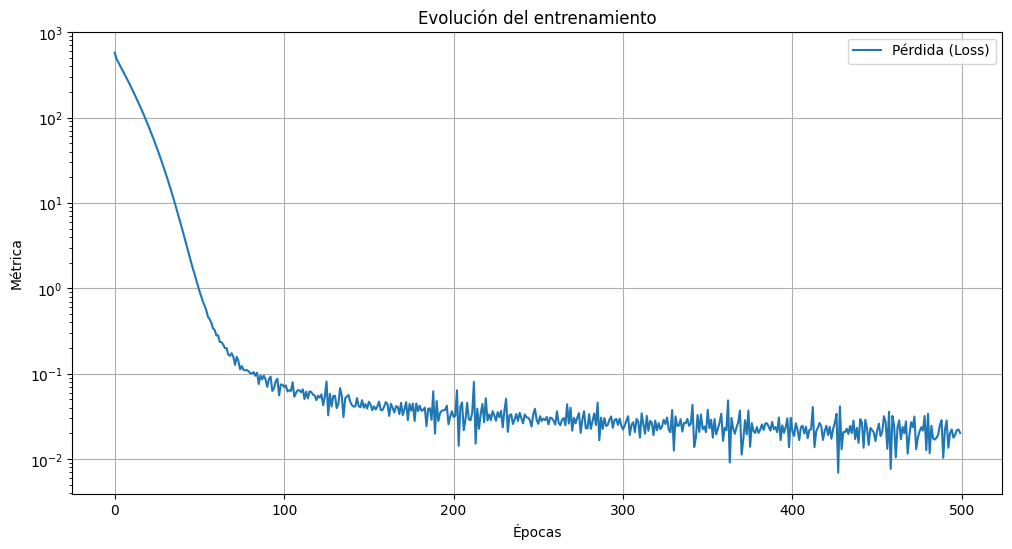

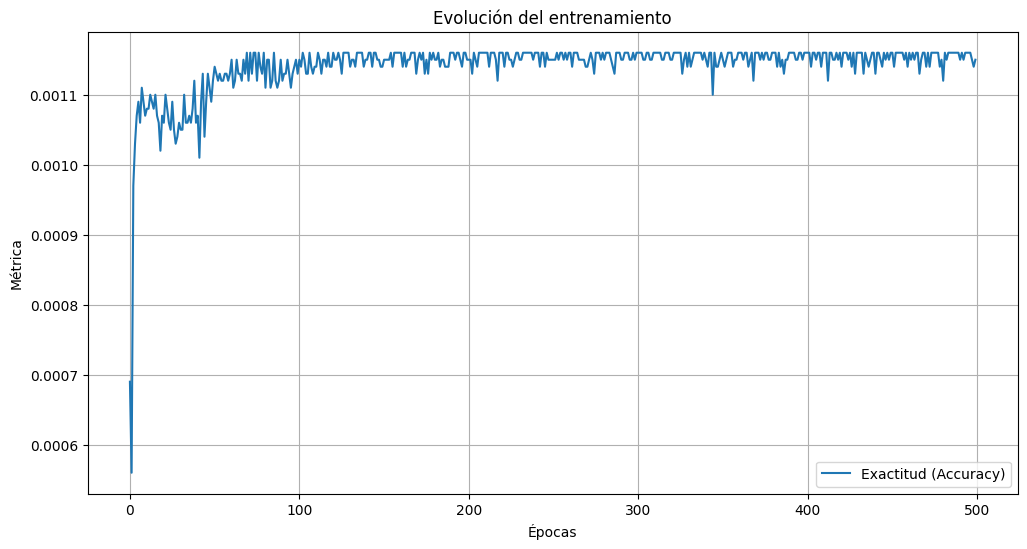

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sesgo_cuadrado_3                │ (None, 4)              │             0 │
│ (SesgoCuadrado)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_158 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_159 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_160 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_161 (Dense)               │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_162 (Dense)               │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,341 (36.49 KB)

 Trainable params: 3,113 (12.16 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,228 (24.33 KB)

In [ ]:
# Graficar historial de entrenamiento
graficar_historial(historia)
modelo.summary()
modelo.save("cavitacion.h5")

In [ ]:
prediccion=np.array([[2000,2000]])/normalizacion  


print(modelo.predict(prediccion)*factor_de_salida)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[968844.6]]
